In [1]:
import pandas as pd
import os, sys

sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), '..')))

from utils.time_utils import TimeProcessorSDPA

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
base_dir = "/Users/andrew/Desktop/Harvard/idreos-research/gpu_profiling"
time_processor_sdpa = TimeProcessorSDPA(base_dir, is_forward=False)
df = time_processor_sdpa.get_data(sample_rate=0.7)

In [6]:
df

,kernel_params,dtype,backend,b,h,s_q,s_kv,d_qk,d_v,is_causal,time,gflops
0,b16.flash.2.4.256.128.160.160.0,b16,flash,2,4,256,128,160,160,0,0.109568,0.167772
1,b16.flash.16.4.1024.1024.48.48.0,b16,flash,16,4,1024,1024,48,48,0,0.375808,12.884902
2,b16.flash.16.4.1024.1024.96.96.1,b16,flash,16,4,1024,1024,96,96,1,0.436224,25.769804
3,b16.flash.16.4.128.256.176.176.0,b16,flash,16,4,128,256,176,176,0,0.129024,1.476395
4,b16.flash.2.4.256.1024.224.224.0,b16,flash,2,4,256,1024,224,224,0,0.123392,1.879048
...,...,...,...,...,...,...,...,...,...,...,...,...
99723,32.efficient.32.16.64.256.128.64.1,32,efficient,32,16,64,256,128,64,1,0.781312,3.221225
99724,32.efficient.8.16.512.256.32.128.1,32,efficient,8,16,512,256,32,128,1,0.975872,5.368709
99725,32.efficient.4.16.256.512.32.128.1,32,efficient,4,16,256,512,32,128,1,0.314880,2.684355
99726,32.efficient.32.16.64.64.256.128.0,32,efficient,32,16,64,64,256,128,0,0.527872,1.610613


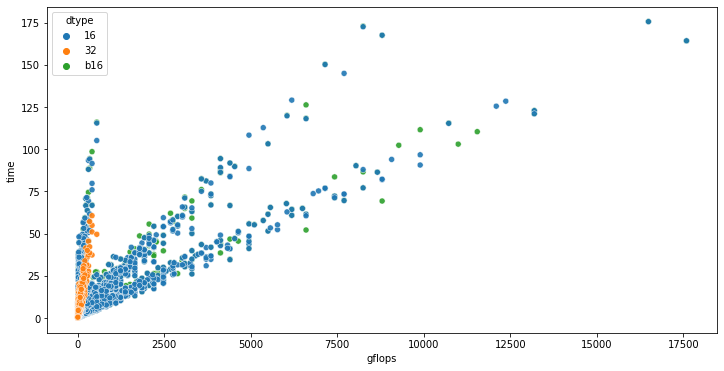

In [7]:
plt.figure(figsize=(12,6))
sns.scatterplot(x="gflops", y="time", hue="dtype", alpha=0.9, data=df)
plt.show()

dtype: 32. is_causal: 0---------------------


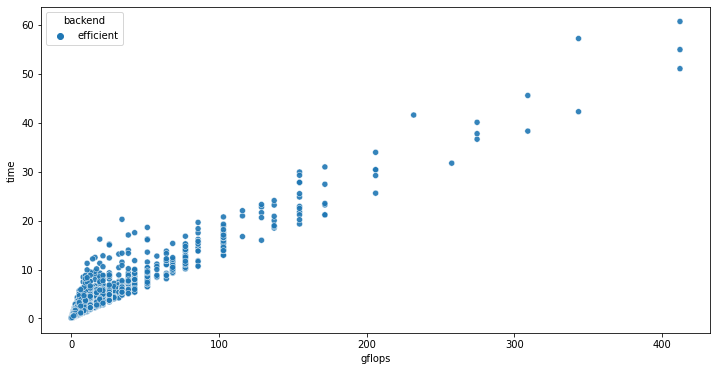

dtype: 32. is_causal: 1---------------------


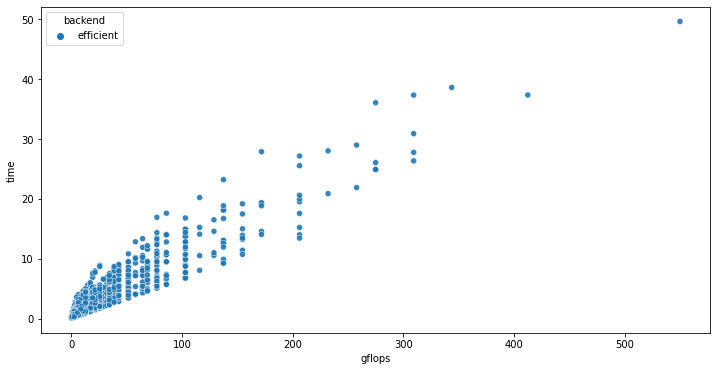

dtype: b16. is_causal: 0---------------------


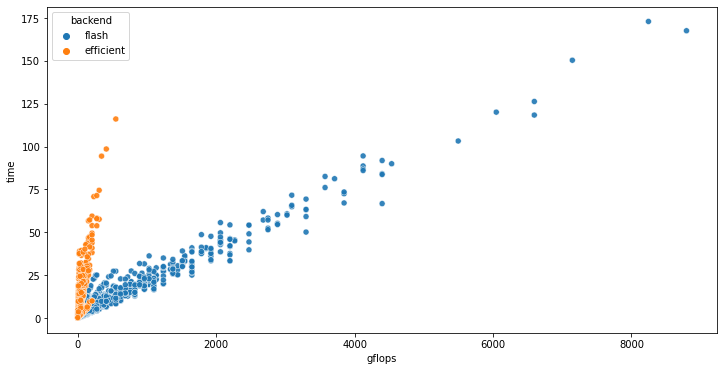

dtype: b16. is_causal: 1---------------------


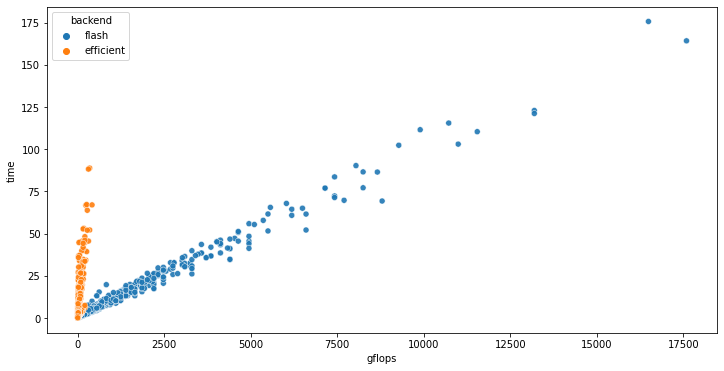

dtype: 16. is_causal: 0---------------------


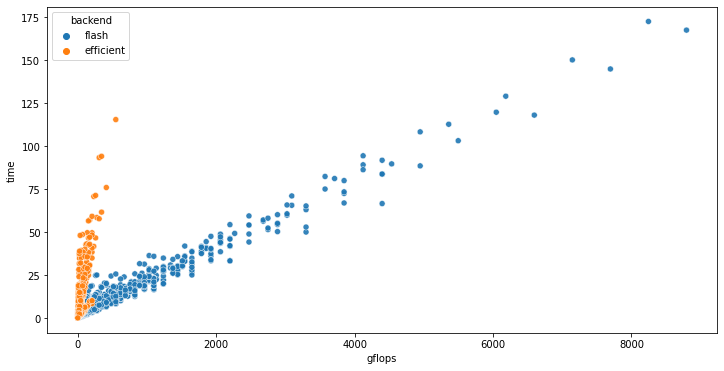

dtype: 16. is_causal: 1---------------------


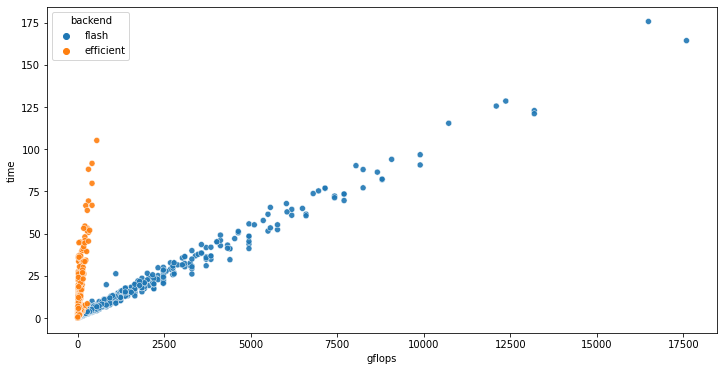

In [16]:
for dtype in ["32", "b16", "16"]:
    for is_causal in [0, 1]:
        print(f"dtype: {dtype}. is_causal: {is_causal}---------------------")
        plt.figure(figsize=(12,6))
        sns.scatterplot(x="gflops", y="time", hue="backend", alpha=0.9, data=df.query(f"dtype == '{dtype}' and is_causal == '{is_causal}'"))
        plt.show()